#**ASSOCIATION - MARKET BASKET ANALYSIS**

This File contains information about Customers buying different grocery items at a Mall.

## 1. Install & import libraries 

In [1]:
# Need to install apyori first
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=3a44f727464ec2f97878e65841c0501166c5a4394d8cbebfdb68287a6daefa90
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori
from wordcloud import WordCloud

## 2. Open our dataset

In [3]:
# Import data local
from google.colab import files
uploaded = files.upload()

Saving Dataset_Asosiasi.csv to Dataset_Asosiasi.csv


In [4]:
#open our dataset 
grocery_item = pd.read_csv('Dataset_Asosiasi.csv', sep=",", header = None)

In [5]:
#see Row dan Column 
grocery_item.shape

(902, 20)

We have .... row, ... column 

In [6]:
#check sample in dataset
grocery_item.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
746,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,eggs,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,fromage blanc,mushroom cream sauce,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,frozen vegetables,tomatoes,mineral water,chicken,green grapes,eggs,chocolate,brownies,fresh bread,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,burgers,mineral water,avocado,corn,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,mineral water,milk,almonds,bacon,eggs,rice,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,chocolate,olive oil,whole wheat rice,cake,green beans,frozen smoothie,cottage cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,frozen vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,burgers,ground beef,spaghetti,mineral water,soup,milk,french wine,honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,herb & pepper,ground beef,cooking oil,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Visualisasi data

1. Wordcloud 

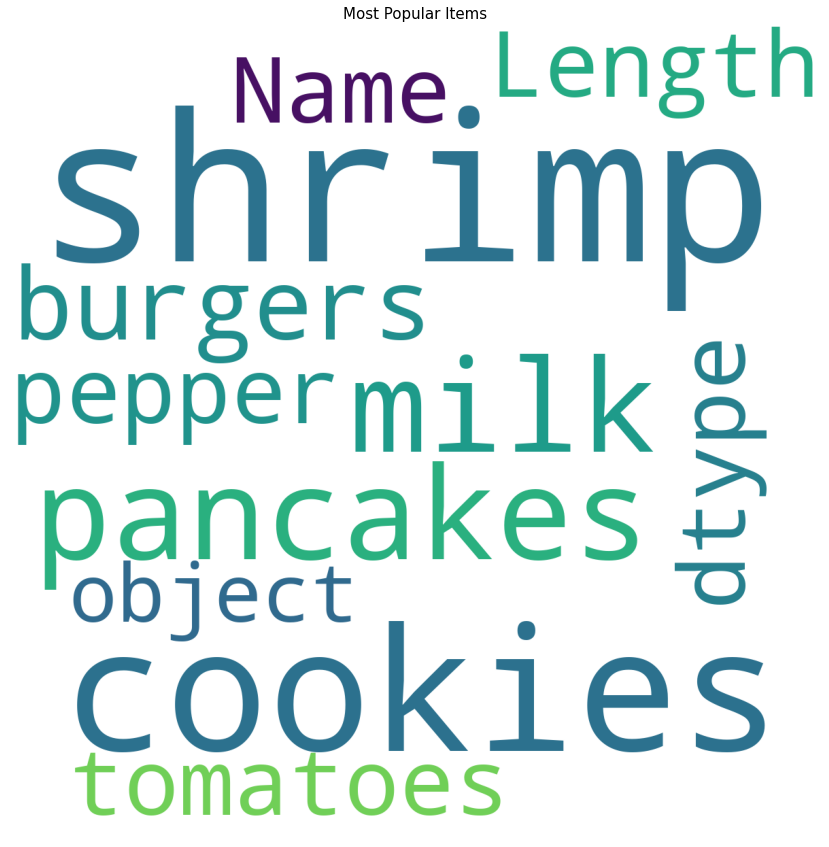

In [7]:
#Hasil Visualisasi Menggunakan wordcloud
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(grocery_item[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

Wordcloud still subjective, check the barchart
2. Barchart

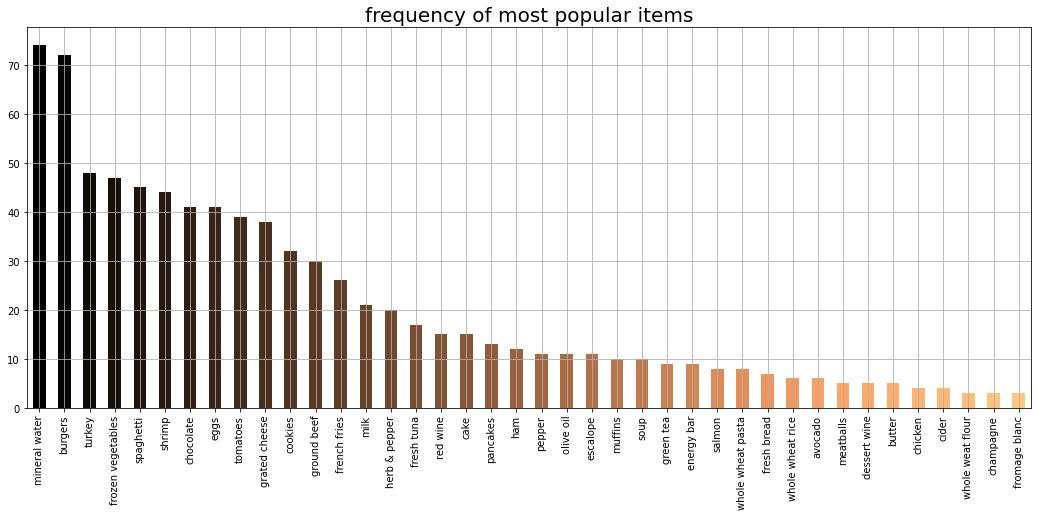

In [8]:
#Visualisasi dn 
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
grocery_item[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## Preprocesing data 

In [9]:
# Data preprocessing
transactions = []
for i in range(0, 902):
  transactions.append([str(grocery_item.values[i,j]) for j in range(0, 20)])

In [10]:
# conveting it into an numpy array
transactions = np.array(transactions)

In [11]:
# checking the shape of the array
print(transactions.shape)

(902, 20)


Use Transaction Encoder, the data dimension show (x row, y collumn)

In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(transactions)
data = pd.DataFrame(data, columns = te.columns_)
# getting the shape of the data
data.shape

(902, 119)

too much column, we need to reduce it to 40 

In [13]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 40

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]
# getting the shape of the data
data.shape

(902, 40)

In [14]:
# let's check the columns

data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

## Algoritma Apriori (Asociation Rules) 

In [15]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least min 0.01 support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.246120,(mineral water)
1,0.092018,(burgers)
2,0.053215,(turkey)
3,0.181818,(chocolate)
4,0.097561,(frozen vegetables)
...,...,...
219,0.012195,"(chocolate, milk, eggs)"
220,0.014412,"(french fries, spaghetti, eggs)"
221,0.012195,"(french fries, spaghetti, milk)"
222,0.015521,"(spaghetti, ground beef, milk)"


set rules rules with  length = 2, and support

In [17]:
frequent_itemsets = apriori(data, min_support =0.02 , use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# getting th item sets with length = 2 and support more than 1%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
36,0.025499,"(burgers, mineral water)",2
37,0.060976,"(chocolate, mineral water)",2
38,0.041020,"(frozen vegetables, mineral water)",2
39,0.064302,"(spaghetti, mineral water)",2
40,0.031042,"(shrimp, mineral water)",2
41,0.056541,"(eggs, mineral water)",2
42,0.031042,"(french fries, mineral water)",2
43,0.032151,"(ground beef, mineral water)",2
44,0.033259,"(tomatoes, mineral water)",2
45,0.057650,"(milk, mineral water)",2


the list above are the list of product that usually bought by customer in couple